# ``aggregate``: Distortions and Pricing Examples

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.core.display import HTML, display
from importlib import reload

# pandas options 
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 30)
pd.set_option('display.max_colwidth', 150)

# matplotlib and plotting options 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# seaborn options 
sns.set(context='paper', style='darkgrid', font='serif')
# sns.set(context='paper', style='ticks', font='serif')

# warnings
import warnings
# warnings.simplefilter('error')
# warnings.simplefilter('ignore')
import logging
logging.getLogger("matplotlib").setLevel(logging.CRITICAL)

In [2]:
# this file is in examples
from importlib import reload
import sys
sys.path.insert(0,'..')
import aggregate as agg

import aggregate.parser as parser
import aggregate.underwriter as trash

uw = trash.Underwriter(debug=False)

# Plan

1. Set up a portfolio
2. Price with several distortions... 

In [15]:
port = uw('''port BASE
    agg MediumCat	10 claims 	1000 x 0   sev 100 * pareto 2.1 - 100 poisson 
    agg LargeCat	1.7 claims  5000 x 0   sev 500 * pareto 1.4 - 500 poisson 
    agg Attrit		90 claims    200 x 0   sev lognorm 50 cv 3 mixed gamma 0.25
''')

In [16]:
port

{ "name": "BASE", 'spec': [{'name': 'MediumCat', 'note': ''}, {'name': 'LargeCat', 'note': ''}, {'name': 'Attrit', 'note': ''}]}

In [17]:
port.recommend_bucket()

,bs10,bs11,bs12,bs13,bs14,bs15,bs16,bs18,bs20
line,,,,,,,,,
MediumCat,3.290198,1.645099,0.822550,0.411275,0.205637,0.102819,0.051409,0.012852,0.003213
LargeCat,12.478044,6.239022,3.119511,1.559756,0.779878,0.389939,0.194969,0.048742,0.012186
Attrit,7.257145,3.628573,1.814286,0.907143,0.453572,0.226786,0.113393,0.028348,0.007087
total,23.025388,11.512694,5.756347,2.878173,1.439087,0.719543,0.359772,0.089943,0.022486


In [18]:
port.update(13, 2.5, add_exa=True, trim_df=False, remove_fuzz=True)

In [19]:
port

,Attrit,LargeCat,MediumCat,total
"(freq, mean)",90,1.7,10,101.7
"(freq, cv)",0.271314,0.766965,0.316228,0.242445
"(freq, skew)",0.501674,0.766965,0.316228,0.488043
"(sev, mean)",37.5235,770.981,84.4067,54.3938
"(sev, cv)",1.37036,1.48685,1.61731,3.44247
"(sev, skew)",2.02959,2.45272,3.90545,17.7292
"(agg, mean)",3377.11,1310.67,844.067,5531.85
"(agg, cv)",0.30737,1.37429,0.601307,0.386848
"(agg, skew)",0.525904,2.09225,1.16684,1.32323
Mean,3377.11,1310.67,844.067,5531.85


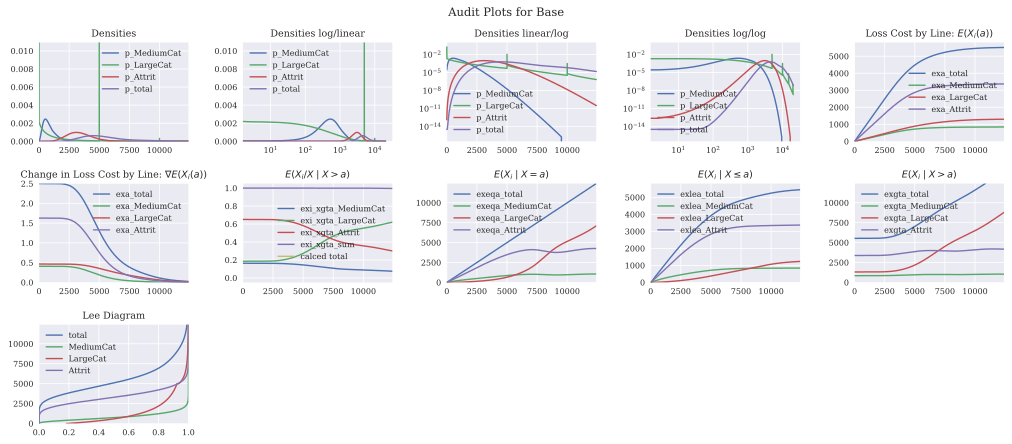

In [20]:
port.plot('audit', aspect=1.414)